In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\Soft\Desktop\Py\Docs\Movie Dataset\IMDB Dataset.csv")

In [3]:
df.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production.   The filming t...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [5]:
df["sentiment"].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [9]:
df["review"][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.  The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.  It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.  I would say the main appeal of the show is due to the fact that it goes where other sh

In [11]:
len(df["review"][0])

1731

In [12]:
word_tokenize(df["review"][0])

['One',
 'of',
 'the',
 'other',
 'reviewers',
 'has',
 'mentioned',
 'that',
 'after',
 'watching',
 'just',
 '1',
 'Oz',
 'episode',
 'you',
 "'ll",
 'be',
 'hooked',
 '.',
 'They',
 'are',
 'right',
 ',',
 'as',
 'this',
 'is',
 'exactly',
 'what',
 'happened',
 'with',
 'me',
 '.',
 'The',
 'first',
 'thing',
 'that',
 'struck',
 'me',
 'about',
 'Oz',
 'was',
 'its',
 'brutality',
 'and',
 'unflinching',
 'scenes',
 'of',
 'violence',
 ',',
 'which',
 'set',
 'in',
 'right',
 'from',
 'the',
 'word',
 'GO',
 '.',
 'Trust',
 'me',
 ',',
 'this',
 'is',
 'not',
 'a',
 'show',
 'for',
 'the',
 'faint',
 'hearted',
 'or',
 'timid',
 '.',
 'This',
 'show',
 'pulls',
 'no',
 'punches',
 'with',
 'regards',
 'to',
 'drugs',
 ',',
 'sex',
 'or',
 'violence',
 '.',
 'Its',
 'is',
 'hardcore',
 ',',
 'in',
 'the',
 'classic',
 'use',
 'of',
 'the',
 'word',
 '.',
 'It',
 'is',
 'called',
 'OZ',
 'as',
 'that',
 'is',
 'the',
 'nickname',
 'given',
 'to',
 'the',
 'Oswald',
 'Maximum',
 'Sec

In [13]:
len(word_tokenize(df["review"][0]))

359

In [14]:
stop_words = set(stopwords.words("english"))

In [18]:
def cleaner(review):
    return [i for i in word_tokenize(review) if i.lower().isalpha()]

In [22]:
def stopword_remover(clean_text):
    return [word for word in clean_text if word not in stop_words]

In [23]:
stopword_remover(cleaner(df["review"][0]))

['One',
 'reviewers',
 'mentioned',
 'watching',
 'Oz',
 'episode',
 'hooked',
 'They',
 'right',
 'exactly',
 'happened',
 'The',
 'first',
 'thing',
 'struck',
 'Oz',
 'brutality',
 'unflinching',
 'scenes',
 'violence',
 'set',
 'right',
 'word',
 'GO',
 'Trust',
 'show',
 'faint',
 'hearted',
 'timid',
 'This',
 'show',
 'pulls',
 'punches',
 'regards',
 'drugs',
 'sex',
 'violence',
 'Its',
 'hardcore',
 'classic',
 'use',
 'word',
 'It',
 'called',
 'OZ',
 'nickname',
 'given',
 'Oswald',
 'Maximum',
 'Security',
 'State',
 'Penitentary',
 'It',
 'focuses',
 'mainly',
 'Emerald',
 'City',
 'experimental',
 'section',
 'prison',
 'cells',
 'glass',
 'fronts',
 'face',
 'inwards',
 'privacy',
 'high',
 'agenda',
 'Em',
 'City',
 'home',
 'many',
 'Aryans',
 'Muslims',
 'gangstas',
 'Latinos',
 'Christians',
 'Italians',
 'Irish',
 'scuffles',
 'death',
 'stares',
 'dodgy',
 'dealings',
 'shady',
 'agreements',
 'never',
 'far',
 'away',
 'I',
 'would',
 'say',
 'main',
 'appeal',
 

In [51]:
reviews = list(map(lambda x : stopword_remover(cleaner(x.lower())), df["review"]))

In [52]:
reviews

[['one',
  'reviewers',
  'mentioned',
  'watching',
  'oz',
  'episode',
  'hooked',
  'right',
  'exactly',
  'happened',
  'first',
  'thing',
  'struck',
  'oz',
  'brutality',
  'unflinching',
  'scenes',
  'violence',
  'set',
  'right',
  'word',
  'go',
  'trust',
  'show',
  'faint',
  'hearted',
  'timid',
  'show',
  'pulls',
  'punches',
  'regards',
  'drugs',
  'sex',
  'violence',
  'hardcore',
  'classic',
  'use',
  'word',
  'called',
  'oz',
  'nickname',
  'given',
  'oswald',
  'maximum',
  'security',
  'state',
  'penitentary',
  'focuses',
  'mainly',
  'emerald',
  'city',
  'experimental',
  'section',
  'prison',
  'cells',
  'glass',
  'fronts',
  'face',
  'inwards',
  'privacy',
  'high',
  'agenda',
  'em',
  'city',
  'home',
  'many',
  'aryans',
  'muslims',
  'gangstas',
  'latinos',
  'christians',
  'italians',
  'irish',
  'scuffles',
  'death',
  'stares',
  'dodgy',
  'dealings',
  'shady',
  'agreements',
  'never',
  'far',
  'away',
  'would',

In [53]:
str_reviews = np.array(list(map(lambda x: [" ".join(x)], reviews)))

In [54]:
str_reviews

array([['one reviewers mentioned watching oz episode hooked right exactly happened first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home many aryans muslims gangstas latinos christians italians irish scuffles death stares dodgy dealings shady agreements never far away would say main appeal show due fact goes shows would dare forget pretty pictures painted mainstream audiences forget charm forget romance oz mess around first episode ever saw struck nasty surreal could say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards sold nickel inmates kill order get away well mannered middle class inmates turned prison bitches d

In [55]:
len(str_reviews)

50000

In [56]:
str_reviews.shape

(50000, 1)

In [57]:
sentiments = df["sentiment"]

In [58]:
sentiments

0        positive
1        positive
2        positive
3        negative
4        positive
           ...   
49995    positive
49996    negative
49997    negative
49998    negative
49999    negative
Name: sentiment, Length: 50000, dtype: object

In [59]:
X_tr, X_te, y_tr, y_te = train_test_split(str_reviews, sentiments, train_size=0.7, random_state=34)

In [60]:
X_tr.shape

(35000, 1)

In [61]:
X_te.shape

(15000, 1)

In [62]:
y_tr.shape

(35000,)

In [63]:
y_te.shape

(15000,)

In [64]:
tokenize = Tokenizer()

In [65]:
tokenize.fit_on_texts(X_tr.ravel())

In [76]:
train_seq = tokenize.texts_to_sequences(X_tr.ravel())

In [77]:
train_seq

[[20,
  102,
  192,
  590,
  13420,
  9535,
  2134,
  1582,
  1267,
  93,
  81,
  170,
  11239,
  25707,
  122,
  192,
  459,
  90,
  8,
  167,
  888,
  1147,
  719,
  378,
  10,
  19,
  2829,
  42656,
  1563,
  14146,
  259,
  555,
  1398,
  20679,
  3532,
  788,
  64,
  1,
  193,
  12,
  115,
  26,
  55,
  9113,
  10221,
  27623,
  37,
  67,
  3968,
  19,
  565,
  2641,
  83,
  25,
  61,
  515,
  1715,
  9,
  298,
  1,
  107,
  3923,
  854,
  123,
  1793,
  340],
 [459,
  560,
  6818,
  579,
  1970,
  6306,
  143,
  1002,
  288,
  699,
  456,
  734,
  631,
  221,
  1665,
  2370,
  1527,
  16951,
  76,
  6605,
  558,
  774,
  269,
  11714,
  4317,
  3776,
  2055,
  956,
  97,
  256,
  97,
  409,
  125,
  2055,
  203,
  71,
  11,
  157,
  3244,
  3245,
  6818,
  504,
  62,
  5240,
  1097,
  7,
  187,
  951,
  168,
  1794,
  11,
  34,
  3,
  520,
  3214,
  110,
  934,
  2055,
  2954,
  137,
  178,
  318,
  405,
  69,
  51,
  51,
  10,
  504,
  1665,
  1140,
  3246,
  456,
  5734,
  23,


In [68]:
tokenize.word_index

{'movie': 1,
 'film': 2,
 'one': 3,
 'like': 4,
 'good': 5,
 'would': 6,
 'even': 7,
 'time': 8,
 'really': 9,
 'see': 10,
 'story': 11,
 'well': 12,
 'much': 13,
 'could': 14,
 'bad': 15,
 'people': 16,
 'get': 17,
 'great': 18,
 'also': 19,
 'first': 20,
 'way': 21,
 'made': 22,
 'make': 23,
 'movies': 24,
 'think': 25,
 'characters': 26,
 'character': 27,
 'watch': 28,
 'films': 29,
 'many': 30,
 'seen': 31,
 'two': 32,
 'never': 33,
 'acting': 34,
 'love': 35,
 'show': 36,
 'best': 37,
 'know': 38,
 'plot': 39,
 'life': 40,
 'little': 41,
 'ever': 42,
 'better': 43,
 'man': 44,
 'end': 45,
 'scene': 46,
 'say': 47,
 'still': 48,
 'scenes': 49,
 'something': 50,
 'go': 51,
 'back': 52,
 'thing': 53,
 'watching': 54,
 'real': 55,
 'actors': 56,
 'though': 57,
 'years': 58,
 'funny': 59,
 'actually': 60,
 'another': 61,
 'makes': 62,
 'nothing': 63,
 'work': 64,
 'find': 65,
 'look': 66,
 'director': 67,
 'lot': 68,
 'going': 69,
 'every': 70,
 'new': 71,
 'old': 72,
 'part': 73,
 'th

In [69]:
X_tr[0]

array(['first saw night falls javier bardem nominated academy award thought got watched mar adentro last night please give time actor convincing touching emotional brilliant see also los lunes al sol understand talking absolute chameleon swear result work movie beautiful well done characters real congratulations alejandro amenábar best director nomination also mention artists ca think another word magnificent really hope movie gets recognition deserves far concerned already'],
      dtype='<U9073')

In [78]:
max_length = max([len(s) for s in train_seq])

In [81]:
max_length

1401

In [82]:
len(train_seq[0])

66

In [83]:
len(train_seq[234])

371

In [114]:
length = 500    ### as max length of review words in 1401 will take more time

In [141]:
padded_train_seq = sequence.pad_sequences(train_seq, maxlen=max_length, padding="post")

In [142]:
len(padded_train_seq[0])

1401

In [143]:
len(padded_train_seq[234])

1401

In [118]:
test_seq = tokenize.texts_to_sequences(X_te.ravel())

In [144]:
padded_test_seq = sequence.pad_sequences(test_seq, maxlen=max_length, padding="post")

In [145]:
train_labels = np.array([1 if i=="positive" else 0 for i in y_tr])
test_labels = np.array([1 if i=="positive" else 0 for i in y_te])

In [148]:
X_tr[1], train_labels[1]

(array(['please earth bava add insult injury making pathetic piece follow crap begin viewers home treated narration unknown informing us aftermath events previous episode indicating mankind triumph demons yeah right tell right anyway anything demons completely new story different backdrop altogether bava usual makes casual appearance even seem fit main context story acting one beyond appalling whole concept demons appearing tv set oh god going go go see usual treated laughable dubbing crap scenarios make sense questions typical sequel dished first batch crap overall one dvd argentophile collector maybe wan na give go otherwise avoid like plague way near first may wan na avoid like plague'],
       dtype='<U9073'),
 0)

In [149]:
train_labels

array([1, 0, 1, ..., 0, 0, 0])

In [150]:
test_labels

array([0, 1, 0, ..., 0, 0, 0])

In [151]:
vocab_size = len(tokenize.word_index)+1
vocab_size

84358

In [155]:
model = Sequential([
    Embedding(vocab_size, 64, input_length = max_length),   ## Use original max_length of words 
    SimpleRNN(100),   ## Use 100 neurons in SimpleRNN
    Dense(1, activation="sigmoid")
])

In [156]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [157]:
model.fit(padded_train_seq, train_labels, epochs=30, validation_data=(padded_test_seq, test_labels))

Epoch 1/30
1094/1094 [==============================] - 485s 443ms/step - loss: 0.6965 - accuracy: 0.5004 - val_loss: 0.6948 - val_accuracy: 0.5026
Epoch 2/30
1094/1094 [==============================] - 494s 451ms/step - loss: 0.6951 - accuracy: 0.5034 - val_loss: 0.6939 - val_accuracy: 0.5029
Epoch 3/30
1094/1094 [==============================] - 504s 460ms/step - loss: 0.6959 - accuracy: 0.4983 - val_loss: 0.6968 - val_accuracy: 0.5031
Epoch 4/30
1094/1094 [==============================] - 529s 483ms/step - loss: 0.6955 - accuracy: 0.4999 - val_loss: 0.7034 - val_accuracy: 0.4997
Epoch 5/30
1094/1094 [==============================] - 462s 422ms/step - loss: 0.6961 - accuracy: 0.5026 - val_loss: 0.6934 - val_accuracy: 0.5029
Epoch 6/30
1094/1094 [==============================] - 461s 422ms/step - loss: 0.6957 - accuracy: 0.4995 - val_loss: 0.6936 - val_accuracy: 0.5033
Epoch 7/30
1094/1094 [==============================] - 461s 422ms/step - loss: 0.6955 - accuracy: 0.5013 - val_

KeyboardInterrupt: 

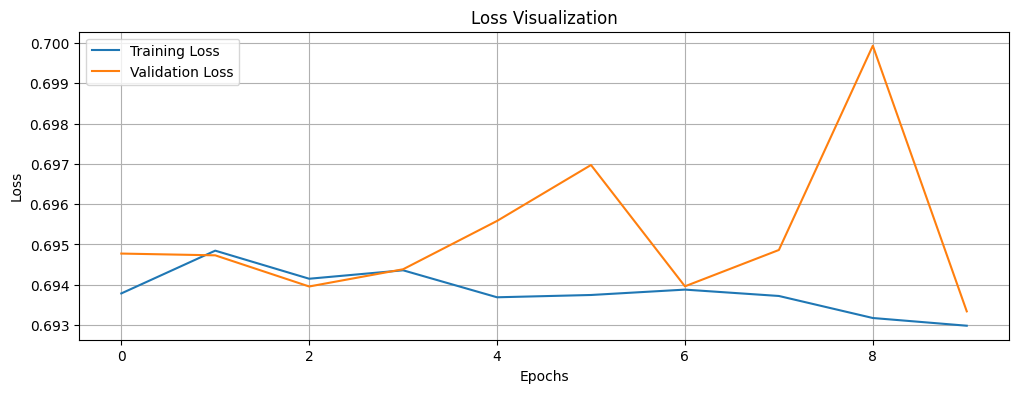

In [128]:
plt.figure(figsize=(12, 4))
plt.plot(model.history.history["loss"], label="Training Loss")
plt.plot(model.history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.grid()
plt.title("Loss Visualization")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

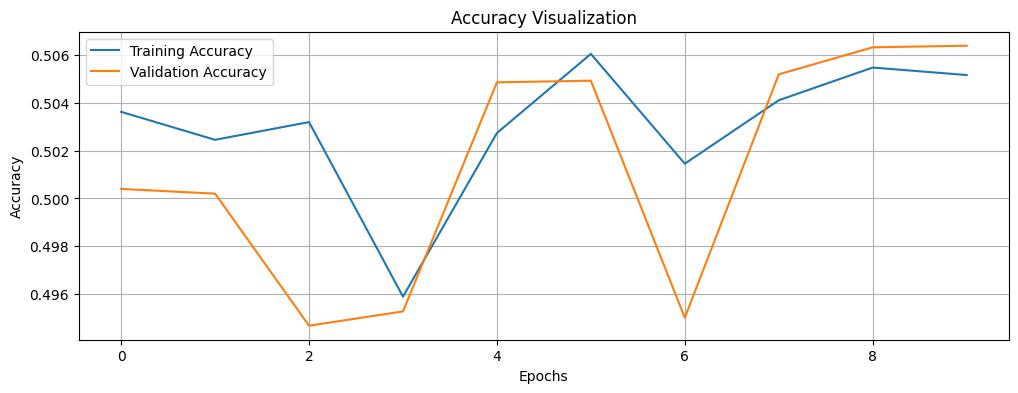

In [129]:
plt.figure(figsize=(12, 4))
plt.plot(model.history.history["accuracy"], label="Training Accuracy")
plt.plot(model.history.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.grid()
plt.title("Accuracy Visualization")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [130]:
new_sentiment = "The cinematography was stunning, the film is masterpeace, a must-watch"

In [133]:
new_seq = tokenize.texts_to_sequences([new_sentiment])

In [134]:
new_seq

[[473, 1261, 2, 106, 28]]

In [135]:
new_padded_seq = sequence.pad_sequences(new_seq, maxlen=length, padding="post")

In [136]:
new_padded_seq

array([[ 473, 1261,    2,  106,   28,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 

In [137]:
pred = model.predict(new_padded_seq)

1/1 [==============================] - 0s 223ms/step


In [140]:
pred

array([[0.47951546]], dtype=float32)

In [138]:
sentiment = "Positive" if pred >= 0.5 else "Negative"

In [139]:
sentiment

'Negative'